In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime
from datetime import date

#File to Load
gun_violence = "gunviolencedata.csv"

#Read the Gun Violence Data

gun_violence_df = pd.read_csv(gun_violence)
gun_violence_df.head()



,incident_id,date,state,city_or_county,n_killed,n_injured
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4
1,460726,1/1/2013,California,Hawthorne,1,3
2,478855,1/1/2013,Ohio,Lorain,1,3
3,478925,1/5/2013,Colorado,Aurora,4,0
4,478959,1/7/2013,North Carolina,Greensboro,2,2


In [3]:
#Rename Columns
gun_violence_df = gun_violence_df.rename(columns={"incident_id":"Incident ID","date":"Date of Incident","state":"State","city_or_county":"City or County","n_killed":"Number of Victims Killed","n_injured":"Number of Victims Injured" })
gun_violence_df.head()


,Incident ID,Date of Incident,State,City or County,Number of Victims Killed,Number of Victims Injured
0,461105,1/1/2013,Pennsylvania,Mckeesport,0,4
1,460726,1/1/2013,California,Hawthorne,1,3
2,478855,1/1/2013,Ohio,Lorain,1,3
3,478925,1/5/2013,Colorado,Aurora,4,0
4,478959,1/7/2013,North Carolina,Greensboro,2,2


In [4]:
#Convert the data type of Date of Incident
gun_violence_df['Date of Incident'] = pd.to_datetime(gun_violence_df['Date of Incident'], errors='coerce')
gun_violence_df['Year'] = gun_violence_df['Date of Incident'].dt.year
gun_violence_df['Month'] = gun_violence_df['Date of Incident'].dt.month
gun_violence_df['Day'] = gun_violence_df['Date of Incident'].dt.day
gun_violence_df['Casualty'] = gun_violence_df['Number of Victims Killed'] + gun_violence_df['Number of Victims Injured']

gun_violence_df.head(10)

,Incident ID,Date of Incident,State,City or County,Number of Victims Killed,Number of Victims Injured,Year,Month,Day,Casualty
0,461105,2013-01-01,Pennsylvania,Mckeesport,0,4,2013,1,1,4
1,460726,2013-01-01,California,Hawthorne,1,3,2013,1,1,4
2,478855,2013-01-01,Ohio,Lorain,1,3,2013,1,1,4
3,478925,2013-01-05,Colorado,Aurora,4,0,2013,1,5,4
4,478959,2013-01-07,North Carolina,Greensboro,2,2,2013,1,7,4
5,478948,2013-01-07,Oklahoma,Tulsa,4,0,2013,1,7,4
6,479363,2013-01-19,New Mexico,Albuquerque,5,0,2013,1,19,5
7,479374,2013-01-21,Louisiana,New Orleans,0,5,2013,1,21,5
8,479389,2013-01-21,California,Brentwood,0,4,2013,1,21,4
9,492151,2013-01-23,Maryland,Baltimore,1,6,2013,1,23,7


In [5]:
#Find out how many victims casualties in each state, this data frame will be used for the line graph.
gun_violence_casualty = gun_violence_df.groupby(['Year', 'State'], as_index=False).agg({'Casualty':'sum'})
#gun_violence_casualty= gun_violence_casualty.set_index(['State','Year','Casualty']).sort_index()
#filtered_state = gun_violence_casualty.loc[gun_violence_casualty['State'] == 'New Jersey']
#filtered_state.set_index('Year')
#filtered_state.Year.tolist()
#gun_violence_casualty.dtypes

In [6]:
#Data Frame needed to create stacked bar graph
gun_violence_killed_injured = gun_violence_df.groupby(['Year','State'], as_index=False).agg({'Incident ID':'count',
                                                                                             'Number of Victims Killed':'sum',
                                                                                             'Number of Victims Injured':'sum'})
gun_violence_killed_injured.head()

,Year,State,Incident ID,Number of Victims Killed,Number of Victims Injured
0,2013,Alabama,2,3,9
1,2013,Arizona,5,8,16
2,2013,California,39,46,139
3,2013,Colorado,3,4,9
4,2013,Connecticut,3,2,13


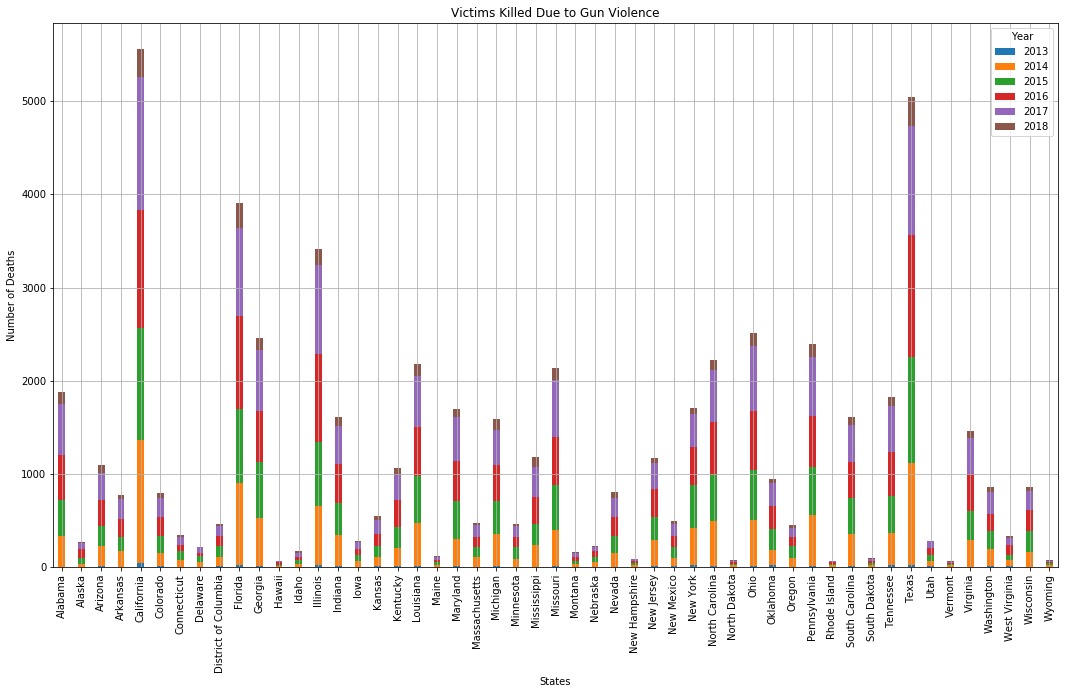

In [7]:
#Graph a stacked bar graph where the x-axis is each state and the stacked bars contain the victims killed for each year
fig,ax=plt.subplots()
stacked_graph=gun_violence_killed_injured.groupby(['State','Year'])['Number of Victims Killed'].first().unstack().plot(kind='bar',width=.35,ax=ax,stacked=True,figsize = (18,10))
plt.title("Victims Killed Due to Gun Violence")
plt.xlabel("States")
plt.ylabel("Number of Deaths")
ax.grid()

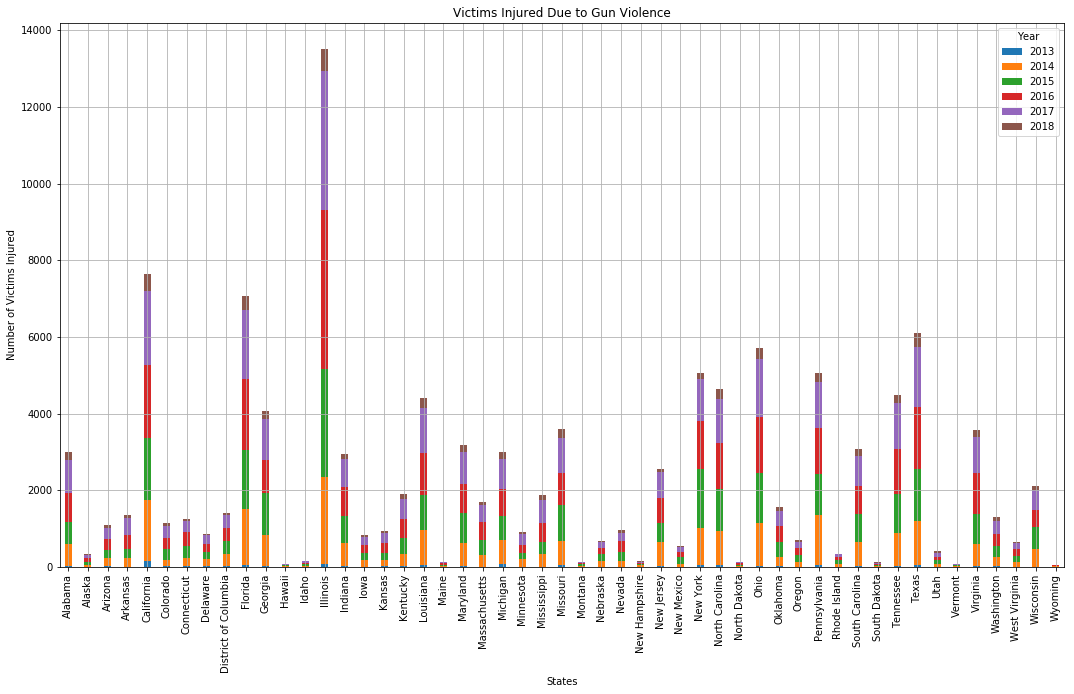

In [8]:
#Graph a stacked bar graph where the x-axis is each state and the stacked bars contain the victims injured for each year
fig,ax=plt.subplots()
stacked_graph=gun_violence_killed_injured.groupby(['State','Year'])['Number of Victims Injured'].first().unstack().plot(kind='bar',stacked=True,ax=ax,width=.35,figsize = (18,10))
plt.title("Victims Injured Due to Gun Violence")
plt.xlabel("States")
plt.ylabel("Number of Victims Injured")
ax.grid()

In [9]:
#Determine the types in the gun_violence_df for reference in create graphs
gun_violence_df.dtypes


Incident ID                           int64
Date of Incident             datetime64[ns]
State                                object
City or County                       object
Number of Victims Killed              int64
Number of Victims Injured             int64
Year                                  int64
Month                                 int64
Day                                   int64
Casualty                              int64
dtype: object

In [ ]:
# Plot a line casualty graph for different states over the different years to see the trend comparising for each state
def casualty_plot(sList):
    
    fig, ax = plt.subplots()
    
    plt.title("Casualties over time for the state of {}".format(', '.join(sList)))
    plt.xlabel("Years")
    plt.ylabel("Number of Casualties")
    fig.set_size_inches(18.5, 10.5)
    for state in sList:
        print(state)
        filtered_state = gun_violence_casualty.loc[gun_violence_casualty['State'] == state]
        

        print(filtered_state.Year.tolist())
        print(filtered_state.Casualty.tolist())
        
        ax.plot(filtered_state.Year.tolist(), filtered_state.Casualty.tolist(), label = state) 
    plt.legend(loc="upper right",title="State")
    ax.grid()
   

In [ ]:
#Take the user input on what state the user would like to use, and plot all lines on one graphp
state  = input("Which state do you want to plot casualties for ? Please seperate states by a comma followed by a space.")
type(state)
sList=state.split(', ')
#print(len(sList))
casualty_plot(sList)